In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [356]:
train_df = pd.read_csv("Exam data_Add tech.csv")
train_df.head()

,Publisher_Id,Revenue(AUG),CR(click to install),Clicks,Installs,Fraud,GP(AUG),Rank1-5
0,1,"$34,904.10",0.114,2.108595e+05,7696,3608.0,"$13,043.81",NaN
1,2,"$2,501.12",0.065,5.009341e+04,1051,150.0,$-306.66,NaN
2,3,"$30,905.06",0.028,9.035158e+05,8025,1885.0,"$1,357.80",NaN
3,4,"$46,287.50",0.013,2.436227e+06,10545,4134.0,"$15,891.12",NaN
4,5,"$17,826.55",0.063,2.388518e+05,4801,4198.0,"$5,630.88",NaN


In [357]:
train_df["Revenue(AUG)"] = train_df["Revenue(AUG)"].apply(lambda x :(x.replace(",", "").replace("-", "NaN").strip()[1:]))
train_df["Revenue(AUG)"] = train_df["Revenue(AUG)"].apply(lambda x : float(x))

In [358]:
train_df.isnull().sum()

Publisher_Id             0
Revenue(AUG)             1
CR(click to install)     0
Clicks                   0
Installs                 0
Fraud                   10
GP(AUG)                  0
Rank1-5                 78
dtype: int64

**Q.1 - Code to identify missing values and null values in the variable fraud and, missing and null values present in the fraud variable is :**

In [359]:
missing_values = train_df["Fraud"].isnull().sum()
print ("missing and null values =" , missing_values)

missing and null values = 10


**Q.2 - The standard deviation and average of revenue variable**

In [360]:
standard_deviation = train_df["Revenue(AUG)"].std()
average_revenue = train_df["Revenue(AUG)"].mean()
print ("standard_deviation = ",standard_deviation)
print ("average_revenue =",average_revenue)

standard_deviation =  8148.960122223222
average_revenue = 4886.4180519480515


**Q.3 - Standard Deviation is the difference between the mean of the revenue and revenue datapoints, while average revenue is the mean of the revenue datapoints.**

In [361]:
import re
from decimal import Decimal
def string_to_float(s):
    if re.match(r'[-]*\d.*', s):
        return float(s)
    else:
        return None

In [362]:
train_df["GP(AUG)"] = train_df["GP(AUG)"].apply(lambda x :(x.replace(",", "").strip()[1:]))
train_df["GP(AUG)"] = train_df["GP(AUG)"].apply(lambda x : (string_to_float(x)))

In [363]:
train_df.describe()

,Publisher_Id,Revenue(AUG),CR(click to install),Clicks,Installs,Fraud,GP(AUG),Rank1-5
count,78.000000,77.000000,78.000000,7.800000e+01,78.000000,68.000000,77.000000,0.0
mean,42.794872,4886.418052,0.430487,1.194578e+05,1176.115385,586.338235,1670.180649,NaN
std,24.998888,8148.960122,1.325129,3.284107e+05,1884.690577,1001.293710,2850.083345,NaN
min,1.000000,0.620000,0.000000,5.185185e-01,0.000000,0.000000,-306.660000,NaN
25%,22.250000,487.660000,0.042750,1.100519e+03,104.750000,15.000000,144.240000,NaN
50%,42.500000,1797.740000,0.112500,1.208763e+04,433.500000,153.000000,655.480000,NaN
75%,63.750000,5951.320000,0.326500,8.834594e+04,1332.750000,642.000000,1891.270000,NaN
max,85.000000,46287.500000,9.429000,2.436227e+06,10545.000000,4198.000000,15891.120000,NaN


**Q4. Publisher number with highest GP**

In [364]:
print("Publisher ID with max GP =", train_df['GP(AUG)'].idxmax()+1)

Publisher ID with max GP = 4


**Q5.Code to construct a Histogram for variable GP**

(array([52., 12.,  7.,  2.,  0.,  1.,  1.,  0.,  1.,  1.]),
 array([ -306.66 ,  1313.118,  2932.896,  4552.674,  6172.452,  7792.23 ,
         9412.008, 11031.786, 12651.564, 14271.342, 15891.12 ]),
 <a list of 10 Patch objects>)

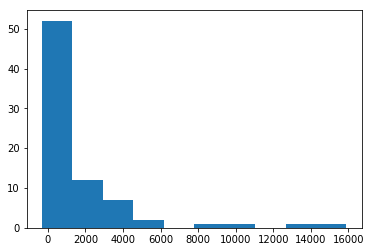

In [365]:
plt.hist(train_df["GP(AUG)"].dropna())

3.1522945074934707

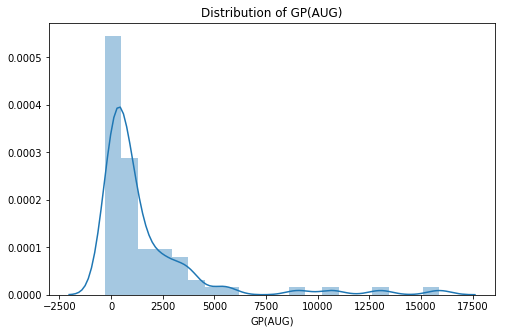

In [366]:
target = train_df["GP(AUG)"].dropna()
plt.figure(figsize=(8,5))
sns.distplot(target)
plt.title('Distribution of GP(AUG)')
from scipy.stats import skew
skew(target)

**Q6. The skewness is positive, so GP is not normally distributed. 
Q7. We can say from the graph too, that the graph is positively skewed.**

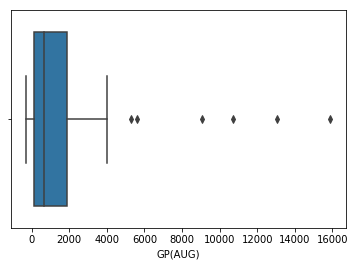

In [367]:
sns.boxplot(target)

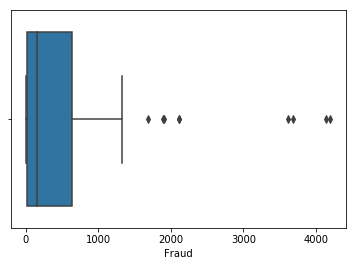

In [368]:
sns.boxplot(train_df.Fraud)

In [369]:
m = train_df.Fraud.mean()
n = train_df.Fraud.median()
var = train_df.Fraud.var()
train_df.Fraud = train_df.Fraud.fillna(n)
tdf = train_df
print(m, n, var)

586.3382352941177 153.0 1002589.0928446001


**Q8. Filling the Fraud empty datapoints with median value as Fraud datapoints has much variance from the mean value** 

In [370]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tdf.drop("Rank1-5", axis=1, inplace=True)
tdf["GP/Rev"] = tdf["GP(AUG)"]/tdf["Revenue(AUG)"]

In [371]:
tdf = tdf.dropna()
tdf_ID = tdf['Publisher_Id']
tdf.drop("Publisher_Id", axis = 1, inplace = True)
tdf = scaler.fit_transform(tdf.dropna())

C:\Users\suraj\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


**Q9.Appropriate formulae weightage for Publishers Ranking, considering Revenue, GP and CR(Click to Install) to be positive weights and fraud to be negative**

In [372]:
def rank_cal(arr):
    rev = arr[0]
    cr = arr[1]
    clicks = arr[2]
    installs = arr[3]
    gp = arr[5]
    fraud = arr[4]
    gpr = arr[6]
    return (0.5*rev+0.5*(gpr)+0.12*installs-0.31112*fraud)

In [373]:
ranks = []
for row in tdf:
    ranks.append(rank_cal(row))
ranks = np.array(ranks)
scaler = MinMaxScaler(feature_range=(1,5))
ranks = scaler.fit_transform(ranks.reshape(-1, 1))

In [374]:
import math
new_ranks = []
for rank in ranks:
    new_ranks.append(6-math.ceil(rank))

 **Q10. Ranking of these publishers based on the score**

In [380]:
sub = pd.DataFrame()
sub['Publisher_Id'] = tdf_ID
sub['Rank1-5'] = new_ranks
sub

,Publisher_Id,Rank1-5
0,1,1
1,2,4
2,3,2
3,4,1
4,5,3
5,6,2
6,7,4
7,8,2
8,9,3
9,10,3


0.008206895085008296

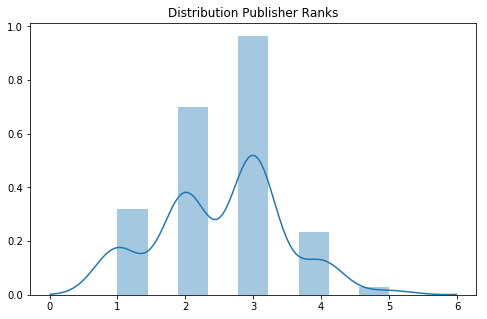

In [381]:
plt.figure(figsize=(8,5))
sns.distplot(new_ranks)
plt.title('Distribution Publisher Ranks')
from scipy.stats import skew
skew(new_ranks)